In [1]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine
from GTGP import GTGP


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

# data

In [3]:
df = pd.read_csv("../data/connect-4.tsv",delimiter='\t')
X = df.iloc[:,:-1].to_numpy().astype("float")
y = df.iloc[:,-1].to_numpy().astype("int")

seeds = [10086, 200,500,30506,30405,30420,10056,7059,40965,5398,869543,83491,823190,
         48392,2810,48392,3498210,483902,859032,12890,538920,86954,54309,6504,9840,
         219805,548,2981,432890,5438908,219094,5843902,60854,979,12890,2108,4093]
train_size = 0.7
dataset = 'connect-4'

In [4]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

# model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[0])

learning_rate=0.1
max_depth=1
bins=8
lam=100

gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

total_size=10
elite_size = 3
epoch= 1000
gp_epoch= 1
verbose = 1
tolerance=0.0001

gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

retrain_epoch=1
alpha=0
beta=1
gammer=0

verbose=1
gtgp.lam = 1
gtgp.retrain_estimators(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

3 9 1
6 18 2
9 27 3
12 36 4
15 45 5
18 54 6
21 63 7
23 69 8
26 78 9
29 87 10
32 96 11
34 102 12
37 111 13
39 117 14
42 126 15
44 132 16
46 138 17
47 141 18
50 150 19
52 156 20
55 165 21
57 171 22
59 177 23
61 183 24
64 192 25
66 198 26
69 207 27
72 216 28
74 222 29
77 231 30
79 237 31
82 246 32
84 252 33
87 261 34
87 261 35
88 264 36
90 270 37
91 273 38
94 282 39
97 291 40
100 300 41
103 309 42
106 318 43
109 327 44
111 333 45
112 336 46
113 339 47
115 345 48
117 351 49
118 354 50
120 360 51
122 366 52
123 369 53
125 375 54
127 381 55
129 387 56
130 390 57
131 393 58
133 399 59
134 402 60
134 402 61
136 408 62
139 417 63
142 426 64
143 429 65
145 435 66
147 441 67
150 450 68
152 456 69
154 462 70
155 465 71
158 474 72
158 474 73
161 483 74
161 483 75
162 486 76
164 492 77
167 501 78
167 501 79
169 507 80
169 507 81
171 513 82
172 516 83
173 519 84
174 522 85
175 525 86
178 534 87
180 540 88
181 543 89
183 549 90
184 552 91
186 558 92
186 558 93
187 561 94
187 561 95
189 567 96
192 576 

([0.6714669373427224,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6584195055932669,
  0.65956142020343,
  0.6599420584068176,
  0.6618663959906109,
  0.6626276723973863,
  0.662669965531096,
  0.6674702362071517,
  0.6674702362071517,
  0.667787434

In [20]:
gtgp_m1 = gtgp

<Axes: >

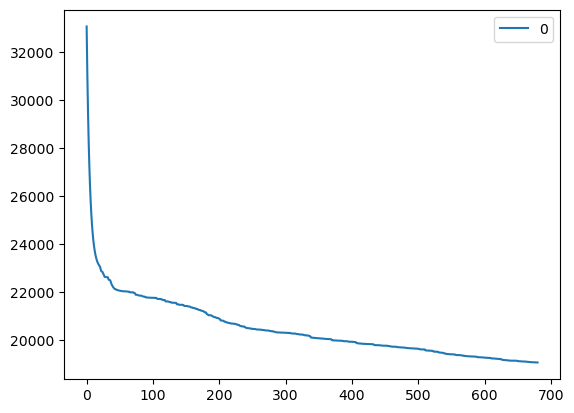

In [21]:
pd.DataFrame(gtgp_m1.train_sse).plot()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[0])

learning_rate=0.1
max_depth=1
bins=8
lam=100

gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

total_size=10
elite_size = 3
epoch= 1000
gp_epoch= 1
verbose = 1
tolerance=0

gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

retrain_epoch=1
alpha=0
beta=1
gammer=0

verbose=1
gtgp.lam = 1
gtgp.retrain_estimators(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

3 9 1
6 18 2
9 27 3
12 36 4
15 45 5
18 54 6
21 63 7
24 72 8
27 81 9
30 90 10
33 99 11
36 108 12
39 117 13
42 126 14
45 135 15
48 144 16
51 153 17
54 162 18
57 171 19
60 180 20
63 189 21
66 198 22
69 207 23
72 216 24
75 225 25
78 234 26
81 243 27
84 252 28
87 261 29
90 270 30
93 279 31
96 288 32
99 297 33
102 306 34
105 315 35
108 324 36
111 333 37
114 342 38
117 351 39
120 360 40
123 369 41
126 378 42
129 387 43
132 396 44
135 405 45
138 414 46
141 423 47
144 432 48
147 441 49
150 450 50
153 459 51
156 468 52
159 477 53
162 486 54
165 495 55
168 504 56
171 513 57
174 522 58
177 531 59
180 540 60
183 549 61
186 558 62
189 567 63
192 576 64
195 585 65
198 594 66
201 603 67
204 612 68
207 621 69
210 630 70
213 639 71
216 648 72
219 657 73
222 666 74
225 675 75
228 684 76
231 693 77
234 702 78
237 711 79
240 720 80
243 729 81
246 738 82
249 747 83
252 756 84
255 765 85
258 774 86
261 783 87
264 792 88
267 801 89
270 810 90
273 819 91
276 828 92
279 837 93
282 846 94
285 855 95
288 864 96
2

([0.6714669373427224,
  0.6714669373427224,
  0.671530377043287,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137727589926,
  0.6583137

In [11]:
gtgp_m2 = gtgp

<Axes: >

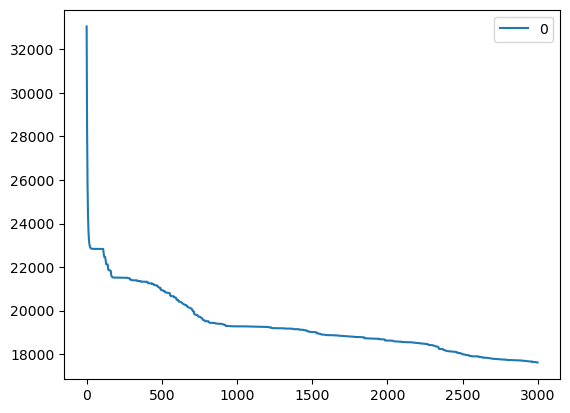

In [12]:
pd.DataFrame(gtgp_m2.train_sse).plot()

# comparison

In [22]:
gtgp_m1.print_model()
print()
print("train acc",gtgp_m1.train_acc[-1])
print("train f1",gtgp_m1.train_f1_score[-1])
print("test acc",gtgp_m1.test_acc[-1])
print("test f1",gtgp_m1.test_f1_score[-1])
gtgp_m2.print_model()
print()
print("train acc",gtgp_m2.train_acc[-1])
print("train f1",gtgp_m2.train_f1_score[-1])
print("test acc",gtgp_m2.test_acc[-1])
print("test f1",gtgp_m2.test_f1_score[-1])

----------------GTGP-------------
Number of Trees: 681
Average of depth: 1.0
Number of nodes: 2043

train acc 0.7118568800355263
train f1 0.41458729233772035
test acc 0.7121570949279653
test f1 0.4147315168286319
----------------GTGP-------------
Number of Trees: 3000
Average of depth: 1.0
Number of nodes: 9000

train acc 0.7338281629977373
train f1 0.4520073376547456
test acc 0.7326327215314782
test f1 0.4500577055998125


In [23]:
gtgp_m1.train_acc[-1],gtgp_m1.train_f1_score[-1],gtgp_m2.train_acc[-1],gtgp_m2.train_f1_score[-1]

(0.7118568800355263,
 0.41458729233772035,
 0.7338281629977373,
 0.4520073376547456)

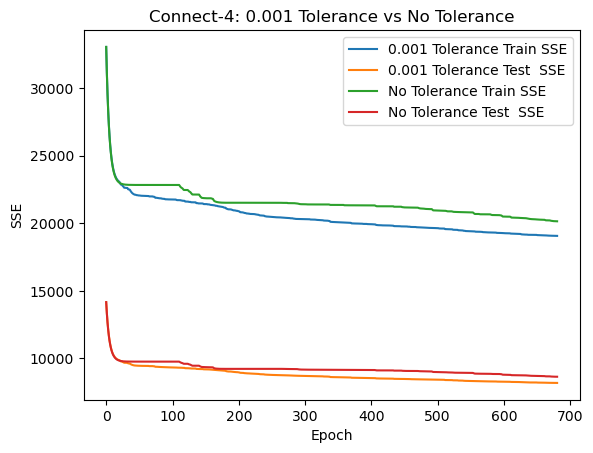

In [26]:
m1_train_sse = np.array(gtgp_m1.train_sse)
m2_train_sse = np.array(gtgp_m2.train_sse)[:m1_train_sse.shape[0]]

m1_test_sse = np.array(gtgp_m1.test_sse)
m2_test_sse = np.array(gtgp_m2.test_sse)[:m1_train_sse.shape[0]]

plt.plot(m1_train_sse)
plt.plot(m1_test_sse)
plt.plot(m2_train_sse)
plt.plot(m2_test_sse)
plt.ylabel("SSE")
plt.xlabel("Epoch")
plt.title("Connect-4: 0.001 Tolerance vs No Tolerance")
plt.legend(["0.001 Tolerance Train SSE","0.001 Tolerance Test  SSE","No Tolerance Train SSE","No Tolerance Test  SSE"])

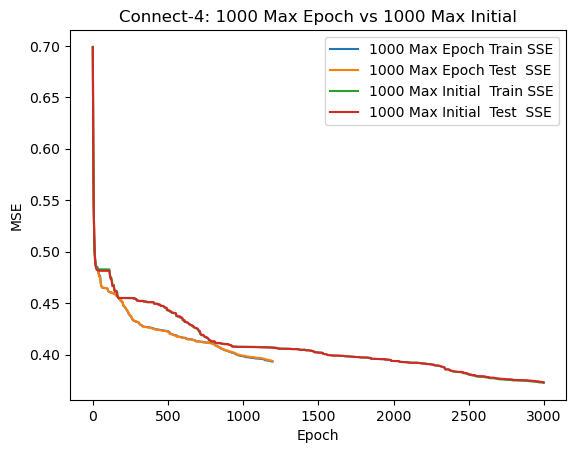

In [17]:
m1_train_sse = np.array(gtgp_m1.train_sse)/y_train.shape[0]
m2_train_sse = np.array(gtgp_m2.train_sse)/y_train.shape[0]

m1_test_sse = np.array(gtgp_m1.test_sse)/y_test.shape[0]
m2_test_sse = np.array(gtgp_m2.test_sse)/y_test.shape[0]

plt.plot(m1_train_sse)
plt.plot(m1_test_sse)
plt.plot(m2_train_sse)
plt.plot(m2_test_sse)

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.title("Connect-4: 1000 Max Epoch vs 1000 Max Initial")
plt.legend(["1000 Max Epoch Train SSE","1000 Max Epoch Test  SSE","1000 Max Initial  Train SSE","1000 Max Initial  Test  SSE"])